<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
PCA</p><br>

Objetivo:
- Experimento

In [1]:
#funciones y clases particulares al caso de estudio
from localpacks.data import get_data

#datasets
import numpy as np
import pandas as pd

#graficos
import matplotlib.pyplot as plt
import seaborn as sns

## Definimos nuestro - df

In [2]:
df_get = get_data(year=2018, apply_format=True) #obtenemos nuestro df con el formato adecuado

In [3]:
df = df_get.copy() #hacemos una copia, para hacer pruebas rapidas, luego esta línea podrá ser borrada

In [4]:
df.head(3)

,usuario_id,origen_nombre,origen_id,destino_nombre,destino_id,usuario_genero,usario_edad,tiempo_uso(s)
bici_fecha_hora_retiro,,,,,,,,
2018-01-01 00:08:05,5453,Uruguay,45,Virrey Cevallos,183,M,45,1193
2018-01-01 00:18:05,673,Posadas,189,Guardia Vieja,110,M,61,1579
2018-01-01 00:20:14,179119,Hospital Rivadavia,50,Padilla,31,F,52,1659


#### 1. Escogemos una estación - ORIGEN

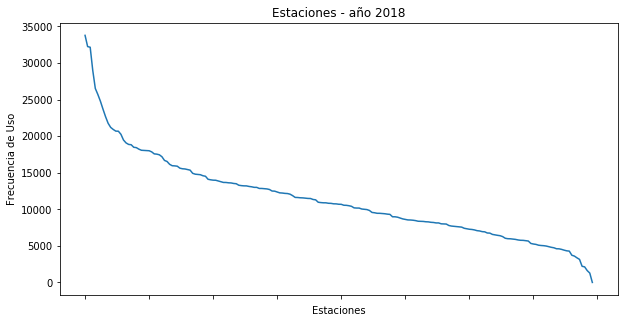

In [5]:
#df['origen_id'].value_counts().sort_values(ascending=False).plot() chequear, ¿porqué el gráfico se vpe distinto?

df['origen_nombre'].value_counts().plot(figsize=(10,5))

plt.title('Estaciones - año 2018')
plt.xlabel('Estaciones')
plt.ylabel('Frecuencia de Uso');

In [6]:
df['origen_nombre'].value_counts()[:3] #filtramos las 3 primeras

Facultad de Medicina    33776
Pacífico                32244
Parque Las Heras        32151
Name: origen_nombre, dtype: int64

Podemos observar que `Facultad de Medicina` es la que tiene la **mayor frecuencia de uso**, es la que usaremos como ejemplo.

In [7]:
df = df[(df['origen_nombre'] == 'Facultad de Medicina')]

In [8]:
df.shape #verificamos

(33776, 8)

## Experimental con Pivot

In [9]:
print('Periodo de estudio: \n inicio:{} ----- fin:{}'.format(df.index.min(), df.index.max()))

Periodo de estudio: 
 inicio:2018-01-02 10:18:58 ----- fin:2018-11-04 20:18:33


In [10]:
#Remuestreo a 1hs
def resample_data_alt(df):
    '''
    Agrupa el conteo de datos a intervalos de 3 horas.
    '''
    df['conteo'] = 1 #creamos un atributo auxiliar que al sumarse, cuenta la frecuencia de uso dentro del intervalo.
    data_resampled = df.resample("D").sum()
    return data_resampled

In [11]:
resample_alt = resample_data_alt(df)

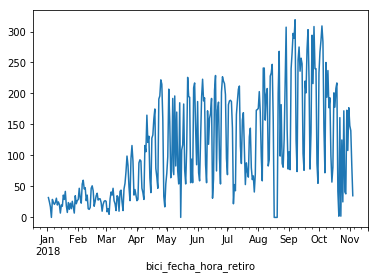

In [12]:
ax = resample_alt['conteo'].plot();
#ax.set_ylim(0,None);

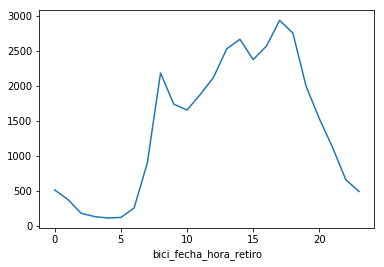

In [13]:
df.groupby(df.index.hour)['conteo'].sum().plot();

## Pivoted

In [14]:
pivoted = df.pivot_table('conteo', columns=df.index.hour, index=df.index.date, aggfunc='sum',fill_value=0)

In [15]:
pivoted.head()

bici_fecha_hora_retiro,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2018-01-02,0,0,0,0,0,0,0,0,0,0,...,0,1,1,6,2,1,3,4,0,1
2018-01-03,1,1,0,0,0,0,0,0,3,1,...,2,0,2,0,2,3,1,2,1,2
2018-01-04,1,2,0,0,0,0,0,4,2,1,...,0,0,0,0,0,0,0,0,0,0
2018-01-06,0,0,0,0,0,0,0,1,3,6,...,2,1,3,2,1,2,1,1,0,1
2018-01-07,1,0,1,0,0,0,1,0,0,0,...,0,2,0,0,3,2,7,0,0,1


In [16]:
pivoted.shape

(301, 24)

In [17]:
print(' Eje días: {} \n Eje horas: {}'.format(pivoted.shape,pivoted.T.shape))

 Eje días: (301, 24) 
 Eje horas: (24, 301)


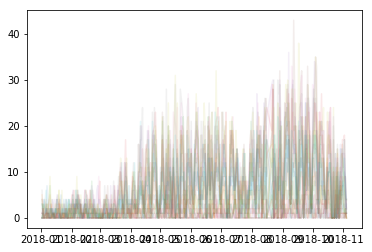

In [18]:
pivoted.plot(legend=False, alpha=0.1); #cada linea representa la frecuencia de uso por horas/día, es decir 24 lineas

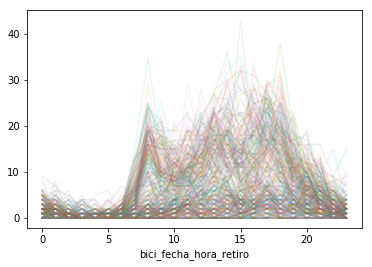

In [19]:
pivoted.T.plot(legend=False, alpha=0.1); #cada linea representa la frecuencia de uso por dias/hora, es decir 301 lineas

In [20]:
from sklearn.decomposition import PCA

In [21]:
pivoted.shape

(301, 24)

In [22]:
X = pivoted.values

In [23]:
X_PCA = PCA(2,svd_solver='full').fit_transform(X)

In [24]:
X_PCA.shape

(301, 2)

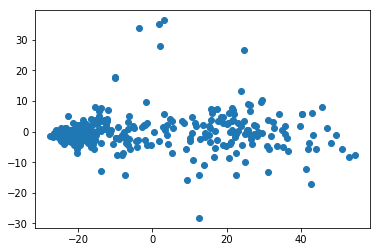

In [25]:
plt.scatter(X_PCA[:,0],X_PCA[:,1]);

In [26]:
from sklearn.mixture import GaussianMixture

In [27]:
gmm = GaussianMixture(2)

In [28]:
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [29]:
labels = gmm.predict(X)

In [30]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1]

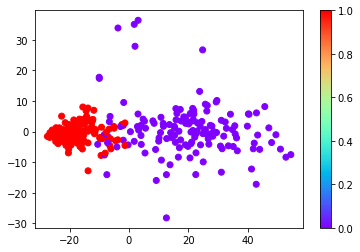

In [31]:
plt.scatter(X_PCA[:,0],X_PCA[:,1], c=labels, cmap='rainbow')
plt.colorbar();

In [32]:
pivoted.T.shape

(24, 301)

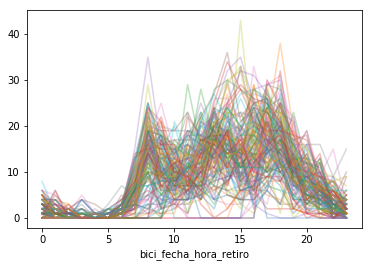

In [33]:
pivoted[labels==0].T.plot(legend=False, alpha=.3);

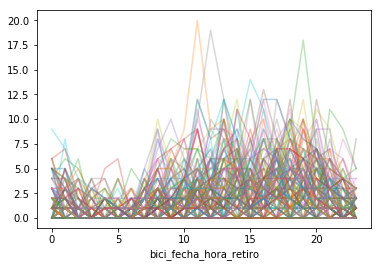

In [34]:
pivoted[labels==1].T.plot(legend=False, alpha=.3);

In [35]:
day_of_week = pd.DatetimeIndex(pivoted.index).dayofweek

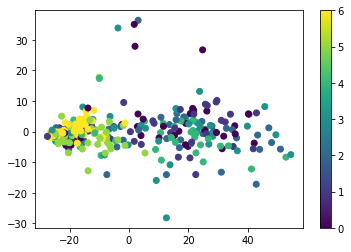

In [36]:
plt.scatter(X_PCA[:,0],X_PCA[:,1], c=day_of_week)
plt.colorbar();

- lun - vie (0-4)
- sab - dom (5-6)

In [37]:
dates = pd.DatetimeIndex(pivoted.index)
dates[(labels==1) & (day_of_week<5)]

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-15', '2018-01-16', '2018-01-17', '2018-01-18',
               '2018-01-19', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26', '2018-01-29', '2018-01-30',
               '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05',
               '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
               '2018-02-12', '2018-02-13', '2018-02-14', '2018-02-15',
               '2018-02-16', '2018-02-19', '2018-02-20', '2018-02-21',
               '2018-02-22', '2018-02-23', '2018-02-26', '2018-02-27',
               '2018-02-28', '2018-03-01', '2018-03-02', '2018-03-05',
               '2018-03-06', '2018-03-07', '2018-03-08', '2018-03-09',
               '2018-03-12', '2018-03-13', '2018-03-14', '2018-03-15',
               '2018-03-16', '2018-03-19', '2018-03-20', '2018-03-21',
      

### Agregamos el tiempo de uso

In [38]:
df = df[['origen_nombre','tiempo_uso(s)']]